In [6]:
from __future__ import print_function, division

In [2]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.path.abspath('.')))

In [3]:
import dta
reload(dta)
from dta import DTA

/home/jly/Desktop/DynamicThresholdAlgorithm4/venv/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import datatools as dt

# Section 1: Load data

In [11]:
raw = dt.load_csv('../data/newdata/concat.csv')

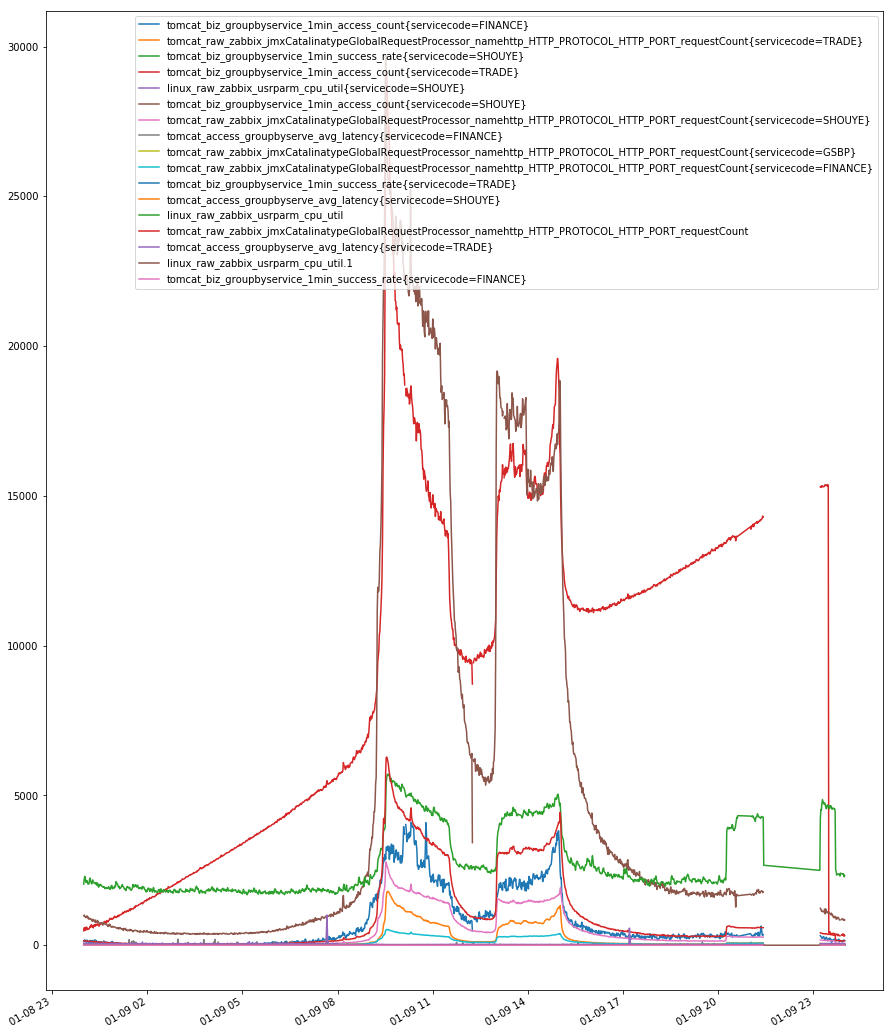

In [18]:
raw['2018-01-09'].plot(figsize=(15, 20))
plt.show()

In [28]:
date_list = dt.get_date_list(raw)

In [19]:
df_list = [raw[[i]] for i in raw.columns]

In [21]:
# define holidays
guoqing = dt.to_date_list(pd.date_range(start='2017-10-01', end='2017-10-08', freq='D'))
yuandan = ['2018-01-01']

In [23]:
dta_list = [DTA(df=i, name=str(i.columns[0]), holiday_list=guoqing+yuandan) for i in df_list]
dta_list

Model:tomcat_biz_groupbyservice_1min_access_count{servicecode=FINANCE} has been built!
Model:tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=TRADE} has been built!
Model:tomcat_biz_groupbyservice_1min_success_rate{servicecode=SHOUYE} has been built!
Model:tomcat_biz_groupbyservice_1min_access_count{servicecode=TRADE} has been built!
Model:linux_raw_zabbix_usrparm_cpu_util{servicecode=SHOUYE} has been built!
Model:tomcat_biz_groupbyservice_1min_access_count{servicecode=SHOUYE} has been built!
Model:tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=SHOUYE} has been built!
Model:tomcat_access_groupbyserve_avg_latency{servicecode=FINANCE} has been built!
Model:tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=GSBP} has been built!
Model:tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehtt

[DTA<tomcat_biz_groupbyservice_1min_access_count{servicecode=FINANCE}>,
 DTA<tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=TRADE}>,
 DTA<tomcat_biz_groupbyservice_1min_success_rate{servicecode=SHOUYE}>,
 DTA<tomcat_biz_groupbyservice_1min_access_count{servicecode=TRADE}>,
 DTA<linux_raw_zabbix_usrparm_cpu_util{servicecode=SHOUYE}>,
 DTA<tomcat_biz_groupbyservice_1min_access_count{servicecode=SHOUYE}>,
 DTA<tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=SHOUYE}>,
 DTA<tomcat_access_groupbyserve_avg_latency{servicecode=FINANCE}>,
 DTA<tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=GSBP}>,
 DTA<tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=FINANCE}>,
 DTA<tomcat_biz_groupbyservice_1min_success_rate{servicecode=TRADE}>,
 DTA

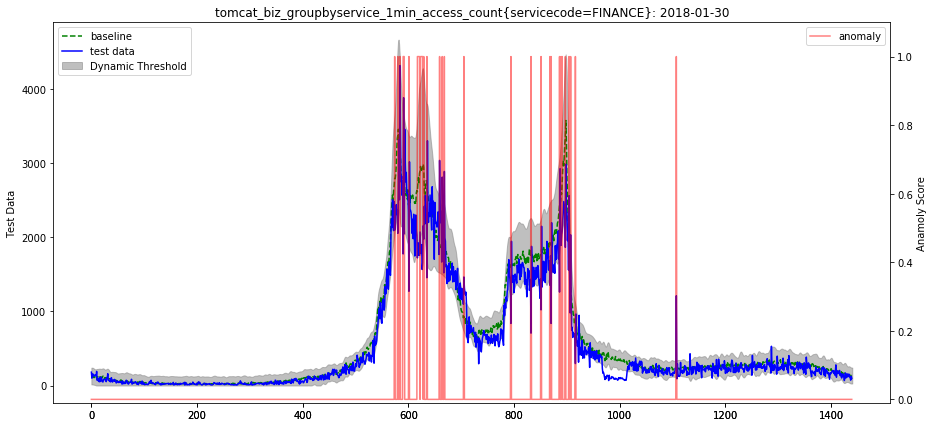

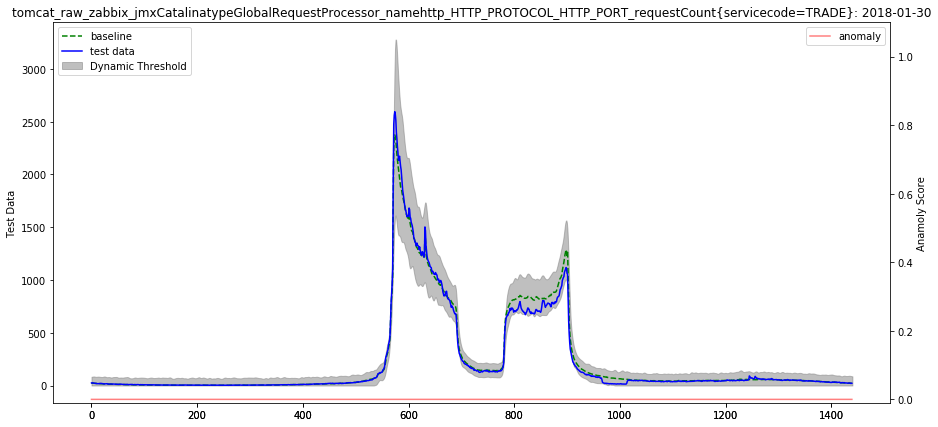

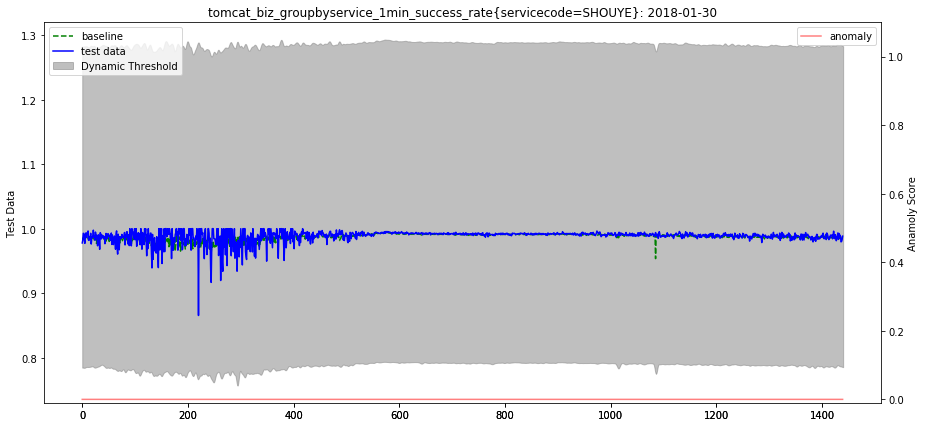

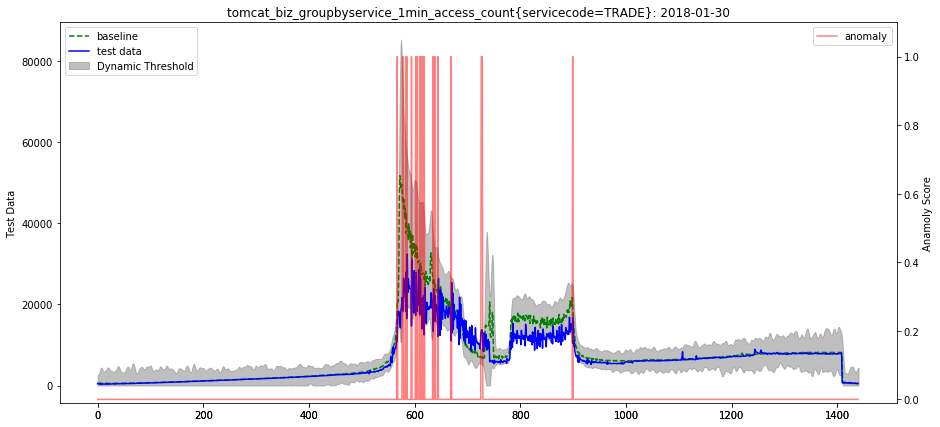

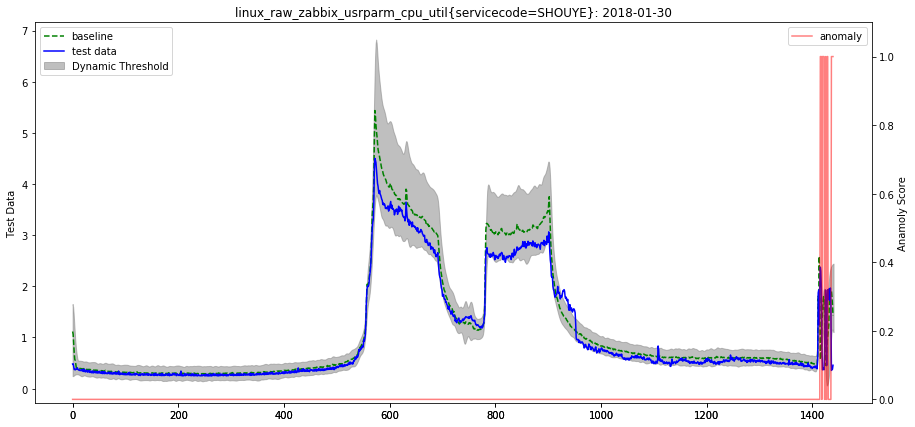

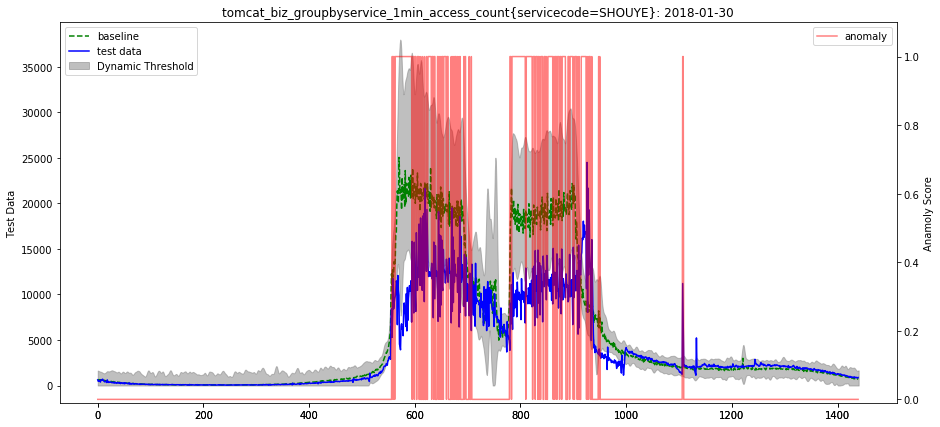

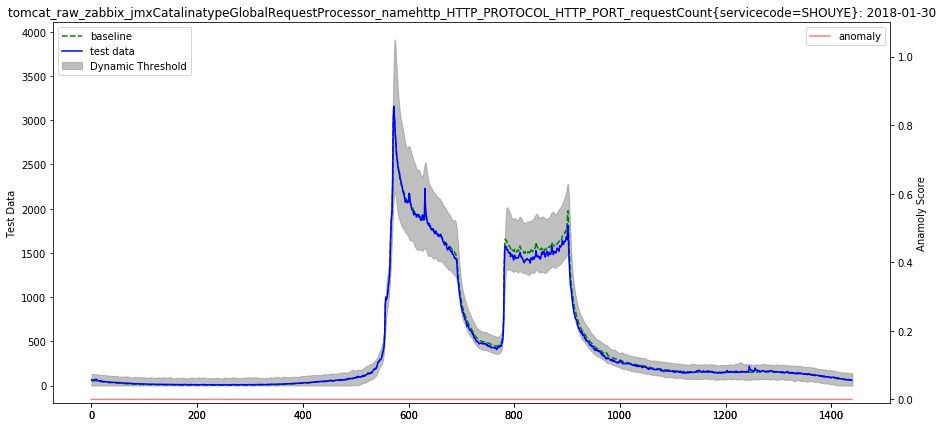

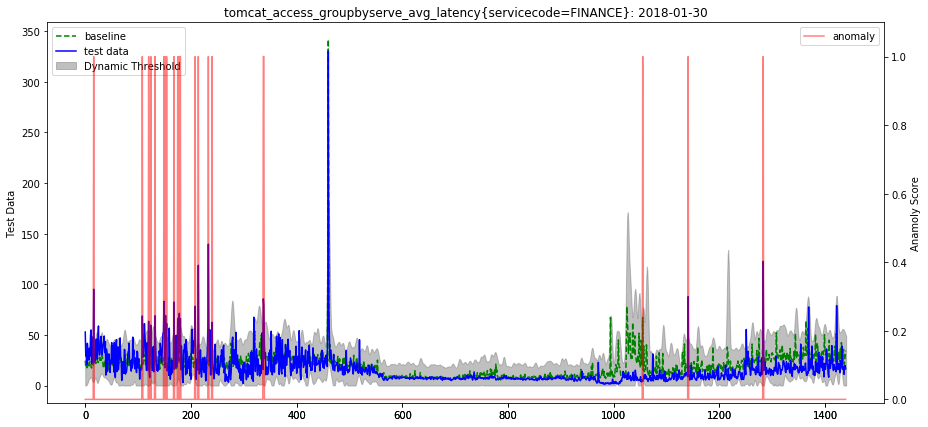

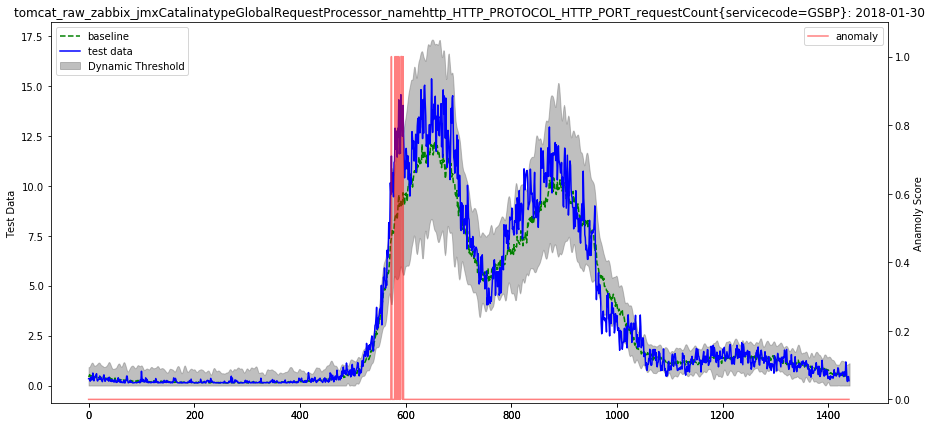

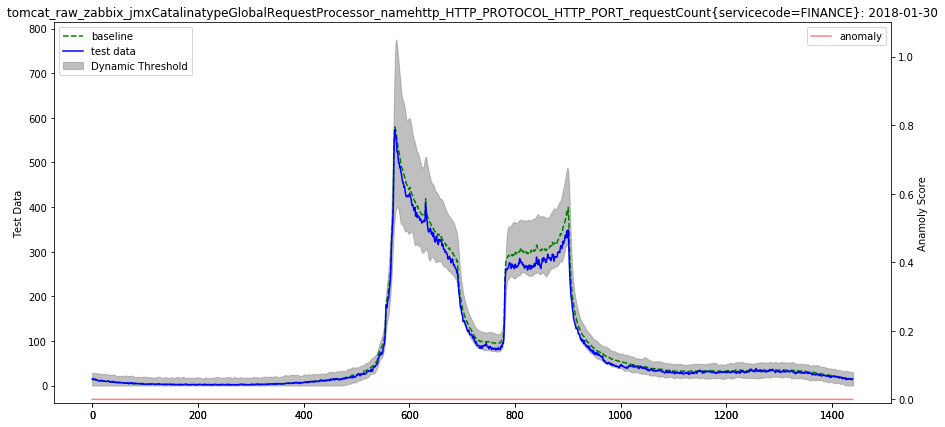

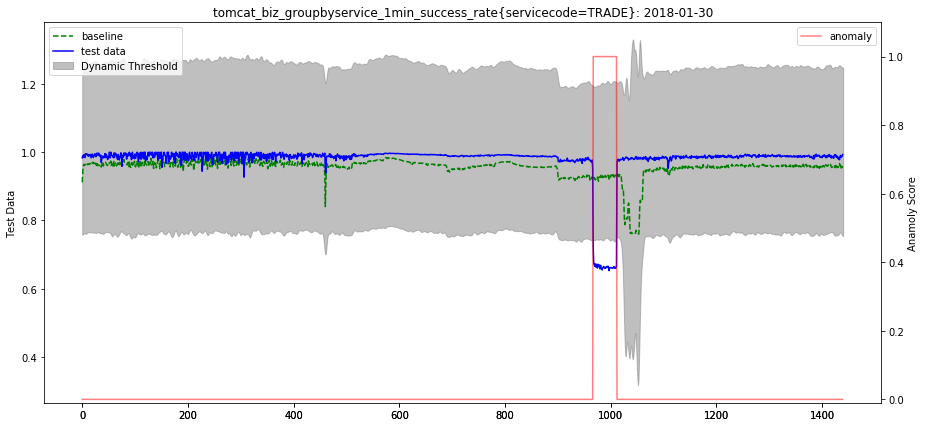

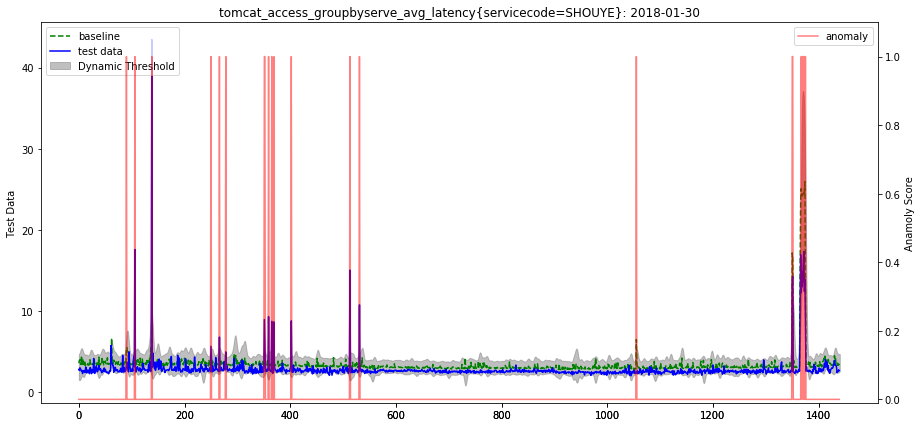

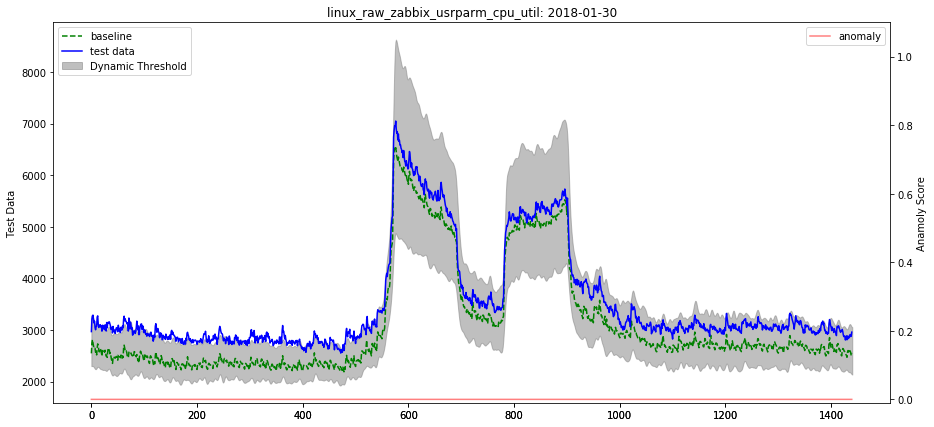

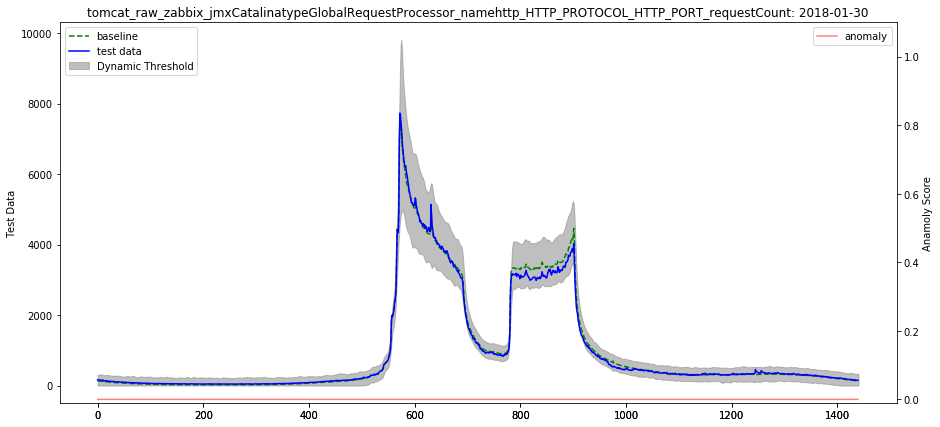

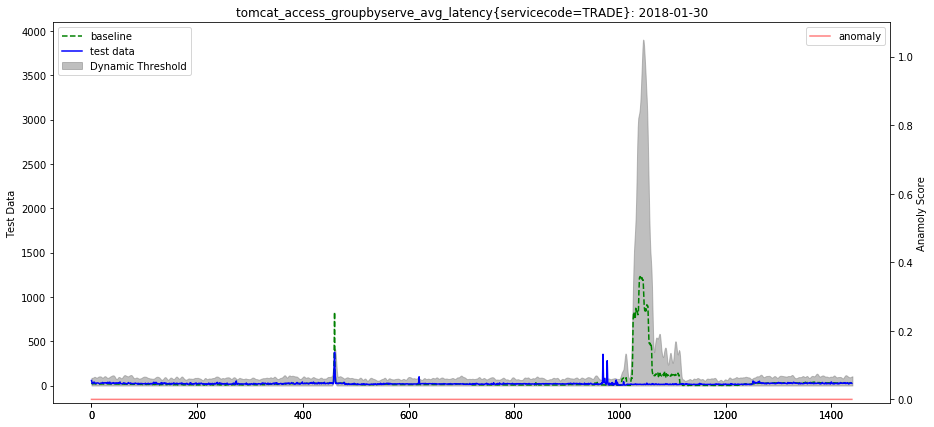

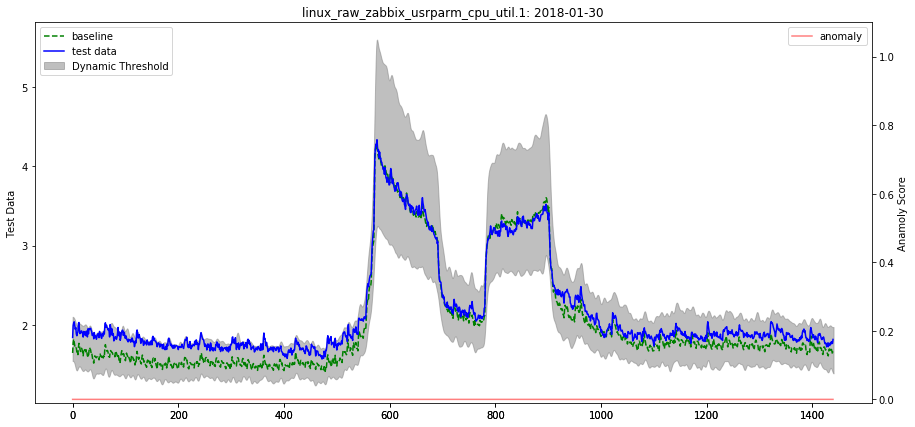

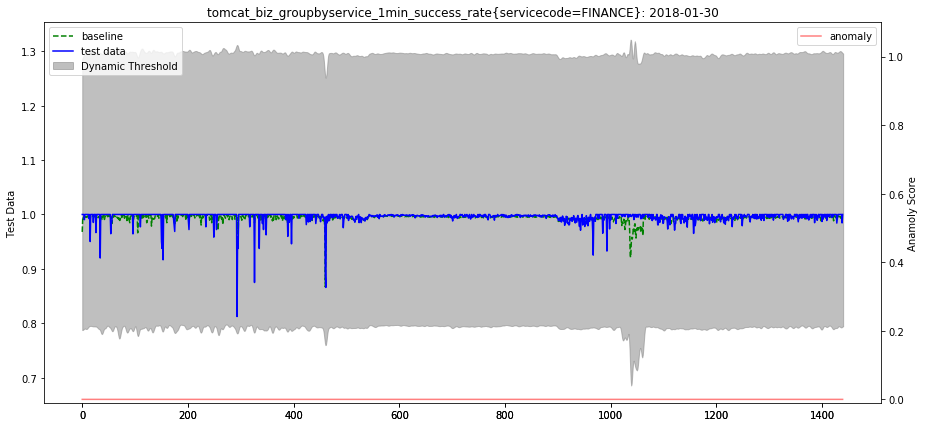

In [27]:
anomaly_list = [dta_list[i].detect(df_list[i].loc[date_list[-2]], verbose=1) for i in range(len(df_list))]

In [34]:
from random import choice

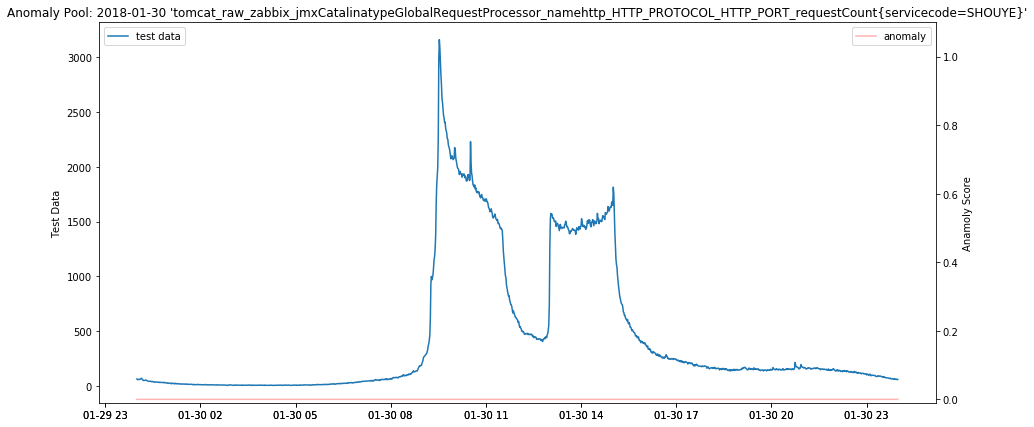

In [70]:
choose_metric = choice(range(len(raw.columns)))
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax1.plot(df_list[choose_metric].loc['2018-01-30':'2018-01-30'], label='test data')
ax1.set_ylabel('Test Data')
ax2.plot(anomaly_list[choose_metric], 'r', label='anomaly', alpha=0.3)
ax2.set_ylabel('Anamoly Score')
ax2.yaxis.set_label_position('right')
ax2.set_ylim([-0.01, 1.1])
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title('Anomaly Pool: 2018-01-30 {!r}'.format(raw.columns[choose_metric]))
plt.show()

## Section 2: 

# AnomalyDetector

In [74]:
# split multi-column data_frame 
def df2cols(df):
    for col in df.columns:
        yield df[[col]]
# test tocols
for i in df2cols(raw):
    print(i.columns)

Index([u'tomcat_biz_groupbyservice_1min_access_count{servicecode=FINANCE}'], dtype='object')
Index([u'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=TRADE}'], dtype='object')
Index([u'tomcat_biz_groupbyservice_1min_success_rate{servicecode=SHOUYE}'], dtype='object')
Index([u'tomcat_biz_groupbyservice_1min_access_count{servicecode=TRADE}'], dtype='object')
Index([u'linux_raw_zabbix_usrparm_cpu_util{servicecode=SHOUYE}'], dtype='object')
Index([u'tomcat_biz_groupbyservice_1min_access_count{servicecode=SHOUYE}'], dtype='object')
Index([u'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=SHOUYE}'], dtype='object')
Index([u'tomcat_access_groupbyserve_avg_latency{servicecode=FINANCE}'], dtype='object')
Index([u'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{servicecode=GSBP}'], dtype='object')
Index([u'tomcat

In [76]:
from time import time

import pandas as pd

from dta import DTA

# import numpy as np
# import matplotlib.pyplot as plt

import datatools as dt

from time import time

import pandas as pd

from dta import DTA

import numpy as np
# import matplotlib.pyplot as plt

import datatools as dt

"""
Anomaly Detector
Author: jly
"""

__version__ = '1.1'


class AnomalyDetector(object):
    """
    Anomaly Detector for multi-metric data frame
    """

    def __init__(self, data_frame=None, holiday_list=None):
        self._metrics = None
        self._calc = False
        self._lines = None    # dict which contains dynamic threshold
        self._corr = data_frame.corr(method='pearson')
        if data_frame is not None:
            self.fit(data_frame, holiday_list=holiday_list)

    def fit(self, data_frame=None, holiday_list=None):
        start = time()
        if data_frame is not None:
            self._dta_dict = {str(i.columns[0]): DTA(df=i, name=str(
                i.columns[0]), holiday_list=holiday_list) for i in dt.df2cols(data_frame)}
            self._metrics = [str(i.columns[0])
                             for i in dt.df2cols(data_frame)]
        end = time()
        print('DTA classes {!r} Initialized!'.format(self._metrics))
        print('Finished in {:g}s'.format(end - start))

    def detect(self, data_frame, verbose=0, savefig=False):
        frames = []
        columns = data_frame.columns.tolist()
        for i in columns:
            if i in self._metrics:
                frames.append(self._dta_dict[i].detect(
                    data_frame[[i]], verbose=verbose, savefig=savefig))
            else:
                print(
                    'There no threshold for metric: {!s}\nSkipped!'.format(i))
        return pd.concat(frames, axis=1)

    @property
    def lines(self):
        if self._calc:
            return self._lines
        for dta in self._dta_dict.values():
            dta.calculate()
        self._calc = True
        self._lines = {i: self._dta_dict[i].lines for i in self._metrics}
        return {i: self._dta_dict[i].lines for i in self._metrics}

    def adjust(self, kwargs):
        """
        'kwargs' contains the adjust parameters of each metric.
        Format like this:
            ('TRADE', +0.5)
            ('FINANCE', -0.5)
            ('SHOUYE', 0)
        '+': adjust up
        '-': adjust down
        '0': reset to original
        """
        if self._calc:
            for metric, k in kwargs.iteritems():
                print(metric, k)
                if k > 0:
                    self._dta_dict[metric].adjust(method='upper', degree=k)
                elif k < 0:
                    self._dta_dict[metric].adjust(method='lower', degree=-k)
                else:
                    self._dta_dict[metric].adjust(method='reset', degree=0)
            self._lines = {i: self._dta_dict[i].lines for i in self._metrics}
        else:
            raise Exception('Lines to be calculated!')

    def ialert(self, data_frame, kwargs):
        """
        isolation-metric alert
        'kwargs' contains the alert parameters of each metric.
        Format like this:
            ('TRADE', 3)
            ('FINANCE', 2)
            ('SHOUYE', 5)
        """
        anomaly_pool = self.detect(data_frame)
        alert_dict = {}
        for metric, k in kwargs.iteritems():
            if k <= 0:
                raise Exception('Invalid k, must be >=1!')
            alert = anomaly_pool[[metric]].rolling(
                k).sum().fillna(method='bfill')
            alert_dict[metric] = alert.loc[(alert >= k).any(
                axis=1) is True].index.tolist()
        return alert_dict

    def malert(self, data_frame, k):
        """
        multi-metric alert
        k is the common parameter for related metrics
        """
        anomaly_pool = self.detect(data_frame)
        alert = anomaly_pool.rolling(k).sum().fillna(method='bfill')
        return alert.loc[(alert >= k).any(axis=1) is True].index.tolist()


### Test AnomalyDetector

In [176]:
from random import choice 

In [43]:
check_date = '2017-10-09'
end_date = '2017-11-22'

In [44]:
SY, FN, TR = (raw[['SHOUYE']].loc[check_date:end_date],
              raw[['FINANCE']].loc[check_date:end_date],
              raw[['TRADE']].loc[check_date:end_date])

In [581]:
# test initialize
# my_detector =  AnomalyDetector()
# my_detector.fit(raw.loc[check_date:])

# initialize directly
my_detector = AnomalyDetector(raw.loc[check_date:end_date])

Model:SHOUYE has been built!
Model:FINANCE has been built!
Model:TRADE has been built!
DTA classes ['SHOUYE', 'FINANCE', 'TRADE'] Initialized!


In [582]:
# test lines
my_detector.lines

{'FINANCE': Lines(baseline=array([0.79618536, 0.78060515, 0.76728509, ..., 0.84596956, 0.81427092,
       0.79982158]), lower_thresh=array([0.        , 0.        , 0.        , ..., 0.11187296, 0.10967645,
       0.1064293 ]), upper_thresh=array([1.63700437, 1.63966785, 1.64410326, ..., 1.73528667, 1.7399428 ,
       1.74236469])),
 'SHOUYE': Lines(baseline=array([3.21530869, 3.15091188, 3.11864649, ..., 3.33732885, 3.33473203,
       3.31818587]), lower_thresh=array([0., 0., 0., ..., 0., 0., 0.]), upper_thresh=array([7.38470618, 7.39599542, 7.41510977, ..., 7.75844343, 7.77291032,
       7.78040433])),
 'TRADE': Lines(baseline=array([0.5780942 , 0.58988442, 0.57617168, ..., 0.58085035, 0.57173567,
       0.57846468]), lower_thresh=array([0., 0., 0., ..., 0., 0., 0.]), upper_thresh=array([2.50997835, 2.51796713, 2.53403345, ..., 2.61008088, 2.62941123,
       2.63792827]))}

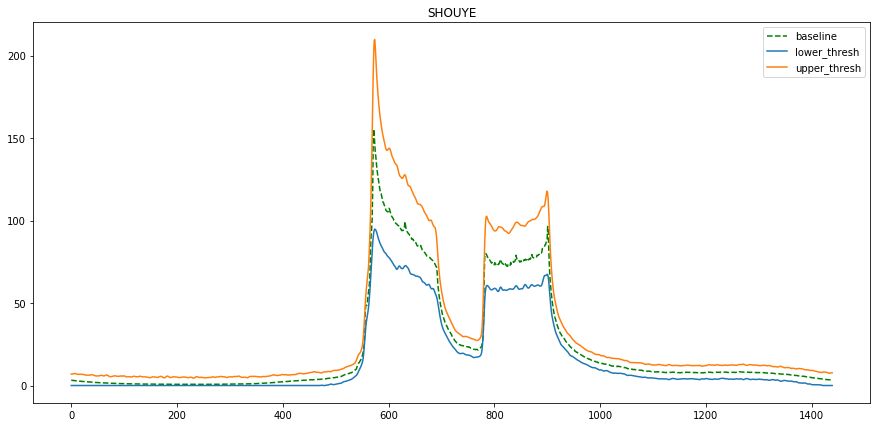

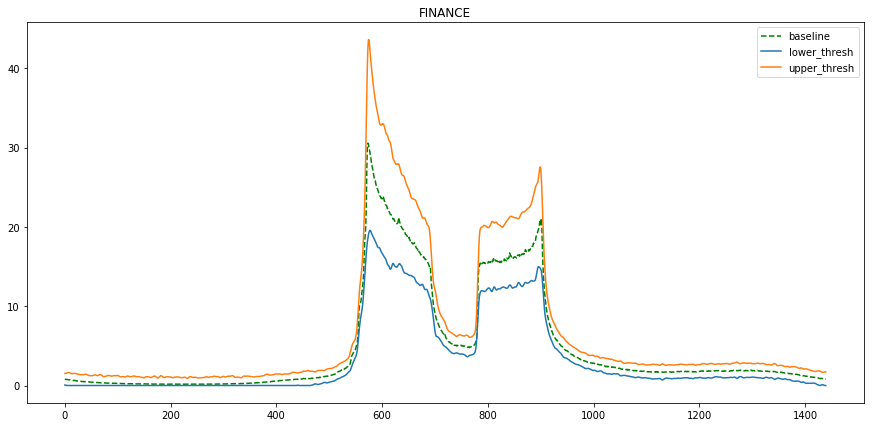

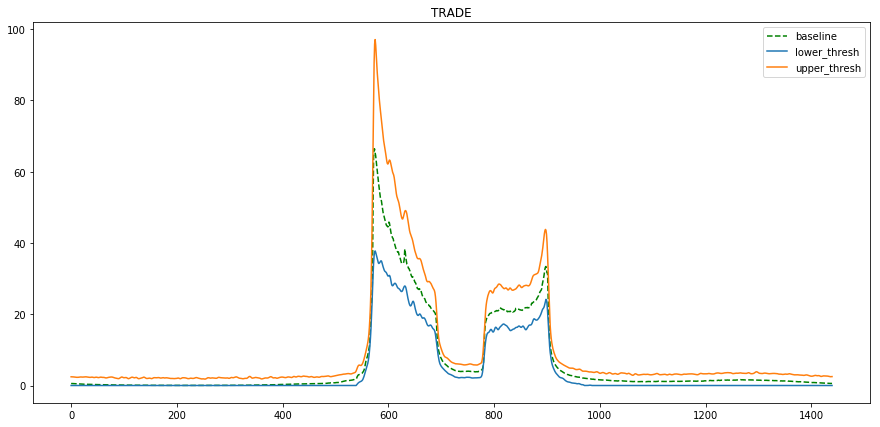

In [553]:
# test adjust
my_detector.adjust(dict(SHOUYE=+0, FINANCE=0, TRADE=0))
metric_list = ['SHOUYE', 'FINANCE', 'TRADE']
test_metric =  choice(metric_list)
for i in metric_list:
    plt.figure(figsize=(15, 7))
    plt.plot(my_detector.lines[i].baseline, 'g--', label='baseline')
    plt.plot(my_detector.lines[i].lower_thresh, label='lower_thresh')
    plt.plot(my_detector.lines[i].upper_thresh, label='upper_thresh')
    plt.title(i)
    plt.legend()
    plt.show()

In [590]:
my_detector.malert(raw.loc['2017-11-23':'2017-11-24'], k=5)

[Timestamp('2017-11-23 14:42:00'),
 Timestamp('2017-11-23 14:43:00'),
 Timestamp('2017-11-23 14:44:00'),
 Timestamp('2017-11-23 14:53:00'),
 Timestamp('2017-11-23 14:54:00')]

In [587]:
my_detector.ialert(raw.loc['2017-11-23':'2017-11-24'], dict(SHOUYE=1, FINANCE=2, TRADE=5))

{'FINANCE': [Timestamp('2017-11-24 12:59:00', freq='T'),
  Timestamp('2017-11-24 13:00:00', freq='T')],
 'SHOUYE': [Timestamp('2017-11-24 12:58:00', freq='T'),
  Timestamp('2017-11-24 12:59:00', freq='T')],
 'TRADE': [Timestamp('2017-11-23 14:42:00'),
  Timestamp('2017-11-23 14:43:00'),
  Timestamp('2017-11-23 14:44:00'),
  Timestamp('2017-11-23 14:53:00'),
  Timestamp('2017-11-23 14:54:00')]}

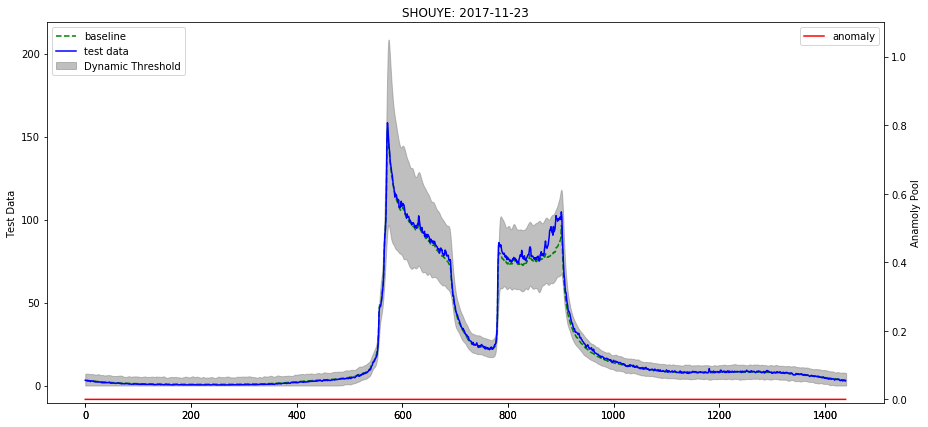

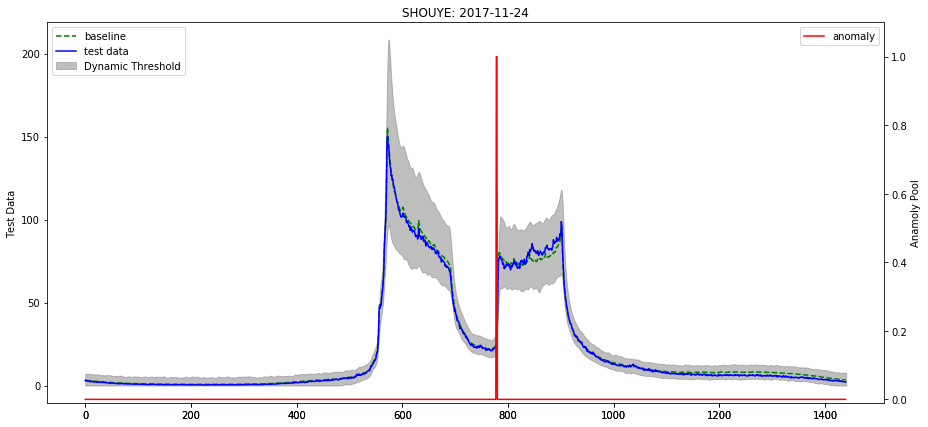

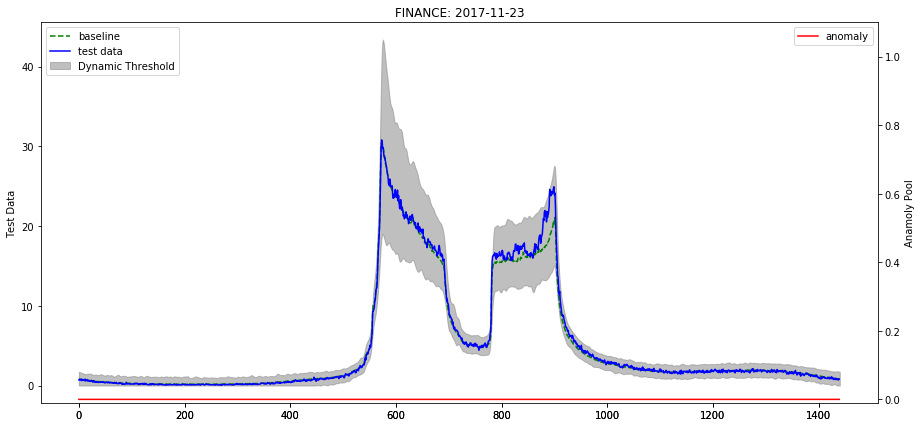

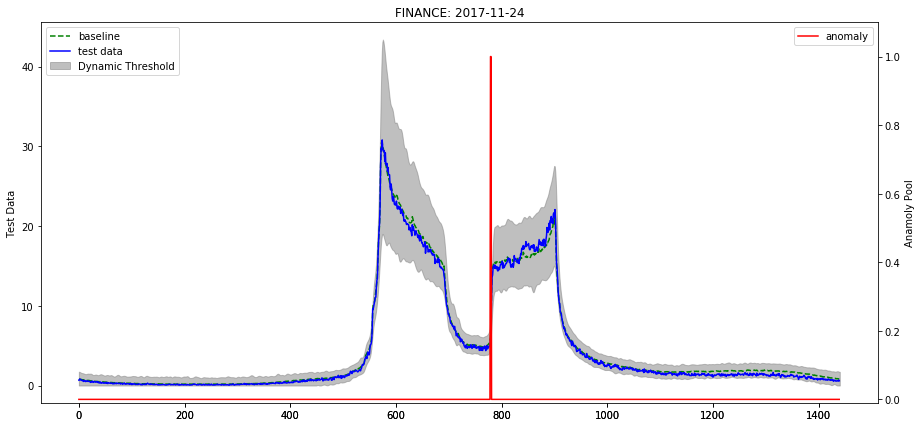

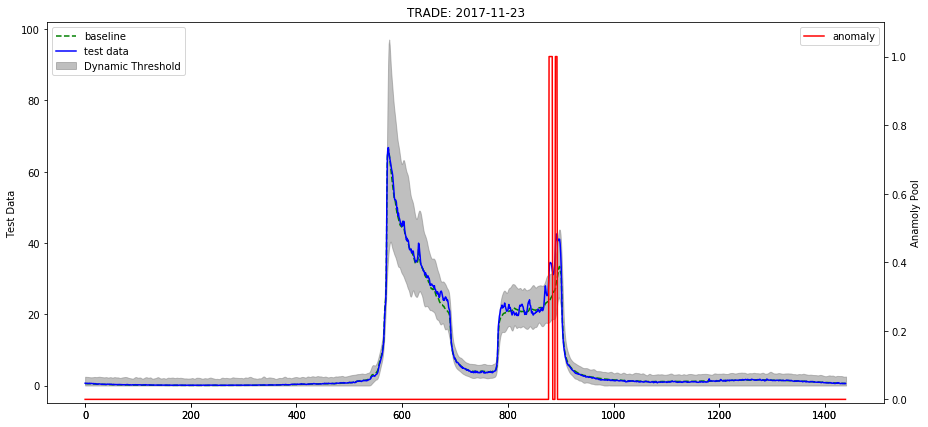

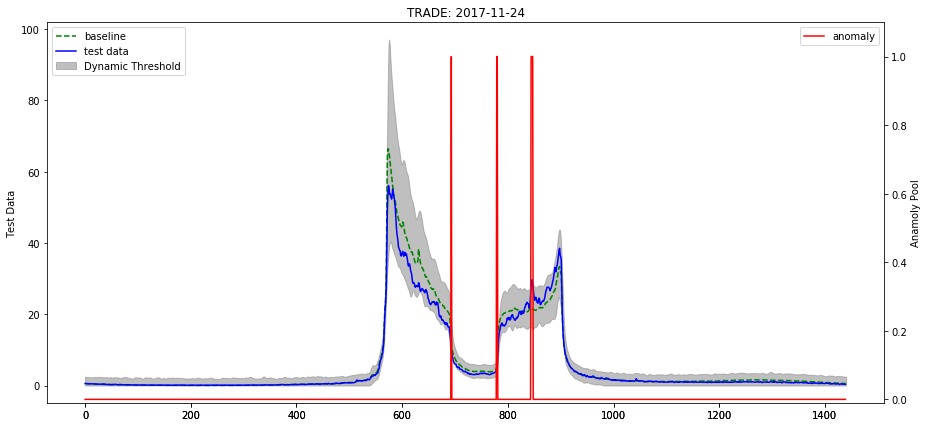

SHOUYE  FINANCE  TRADE
2017-11-23 00:00:00     0.0      0.0    0.0
2017-11-23 00:01:00     0.0      0.0    0.0
2017-11-23 00:02:00     0.0      0.0    0.0
2017-11-23 00:03:00     0.0      0.0    0.0
2017-11-23 00:04:00     0.0      0.0    0.0
2017-11-23 00:05:00     0.0      0.0    0.0
2017-11-23 00:06:00     0.0      0.0    0.0
2017-11-23 00:07:00     0.0      0.0    0.0
2017-11-23 00:08:00     0.0      0.0    0.0
2017-11-23 00:09:00     0.0      0.0    0.0
2017-11-23 00:10:00     0.0      0.0    0.0
2017-11-23 00:11:00     0.0      0.0    0.0
2017-11-23 00:12:00     0.0      0.0    0.0
2017-11-23 00:13:00     0.0      0.0    0.0
2017-11-23 00:14:00     0.0      0.0    0.0
2017-11-23 00:15:00     0.0      0.0    0.0
2017-11-23 00:16:00     0.0      0.0    0.0
2017-11-23 00:17:00     0.0      0.0    0.0
2017-11-23 00:18:00     0.0      0.0    0.0
2017-11-23 00:19:00     0.0      0.0    0.0
2017-11-23 00:20:00     0.0      0.0    0.0
2017-11-23 00:21:00     0.0      0.0    0.0
2017-11-23 00:22:00     0.0      0.0    0.0
2017-11-23 00:23:00     0.0      0.0    0.0
2017-11-23 00:24:00     0.0      0.0    0.0
2017-11-23 00:25:00     0.0      0.0    0.0
2017-11-23 00:26:00     0.0      0.0    0.0
2017-11-23 00:27:00     0.0      0.0    0.0
2017-11-23 00:28:00     0.0      0.0    0.0
2017-11-23 00:29:00     0.0      0.0    0.0
...                     ...      ...    ...
2017-11-24 23:30:00     0.0      0.0    0.0
2017-11-24 23:31:00     0.0      0.0    0.0
2017-11-24 23:32:00     0.0      0.0    0.0
2017-11-24 23:33:00     0.0      0.0    0.0
2017-11-24 23:34:00     0.0      0.0    0.0
2017-11-24 23:35:00     0.0      0.0    0.0
2017-11-24 23:36:00     0.0      0.0    0.0
2017-11-24 23:37:00     0.0      0.0    0.0
2017-11-24 23:38:00     0.0      0.0    0.0
2017-11-24 23:39:00     0.0      0.0    0.0
2017-11-24 23:40:00     0.0      0.0    0.0
2017-11-24 23:41:00     0.0      0.0    0.0
2017-11-24 23:42:00     0.0      0.0    0.0
2017-11-24 23:43:00     0.0      0.0    0.0
2017-11-24 23:44:00     0.0      0.0    0.0
2017-11-24 23:45:00     0.0      0.0    0.0
2017-11-24 23:46:00     0.0      0.0    0.0
2017-11-24 23:47:00     0.0      0.0    0.0
2017-11-24 23:48:00     0.0      0.0    0.0
2017-11-24 23:49:00     0.0      0.0    0.0
2017-11-24 23:50:00     0.0      0.0    0.0
2017-11-24 23:51:00     0.0      0.0    0.0
2017-11-24 23:52:00     0.0      0.0    0.0
2017-11-24 23:53:00     0.0      0.0    0.0
2017-11-24 23:54:00     0.0      0.0    0.0
2017-11-24 23:55:00     0.0      0.0    0.0
2017-11-24 23:56:00     0.0      0.0    0.0
2017-11-24 23:57:00     0.0      0.0    0.0
2017-11-24 23:58:00     0.0      0.0    0.0
2017-11-24 23:59:00     0.0      0.0    0.0

[2880 rows x 3 columns]

In [577]:
my_detector.detect(raw.loc['2017-11-23':'2017-11-24'], verbose=1)

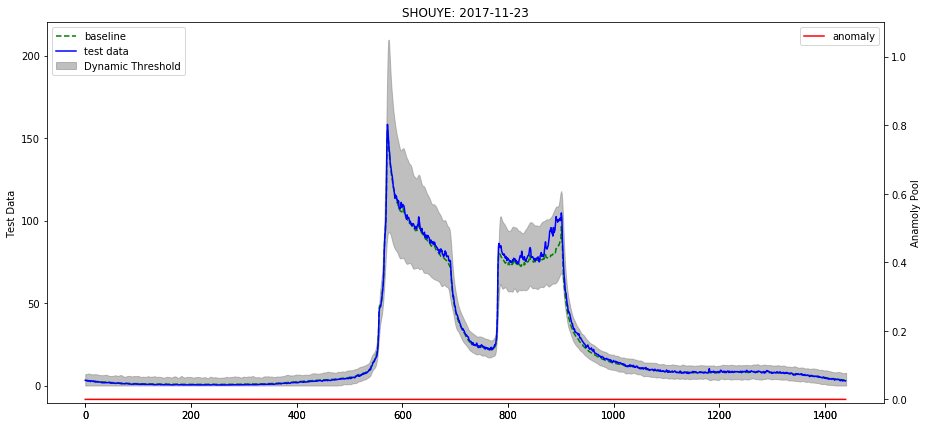

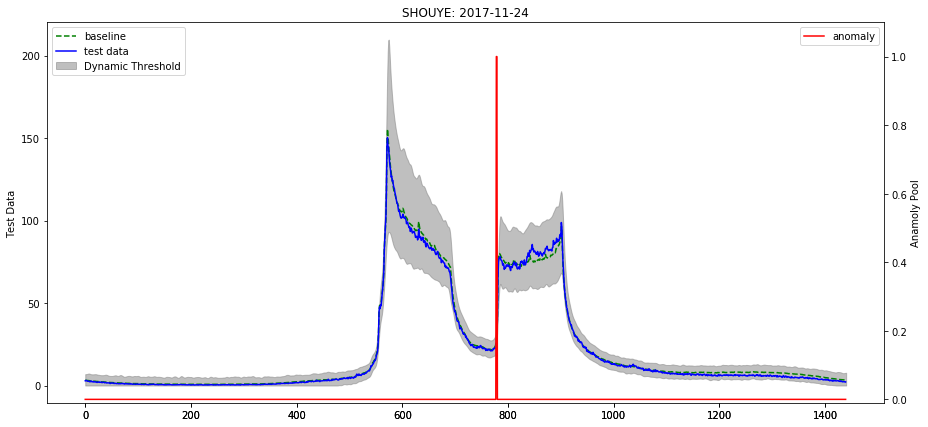

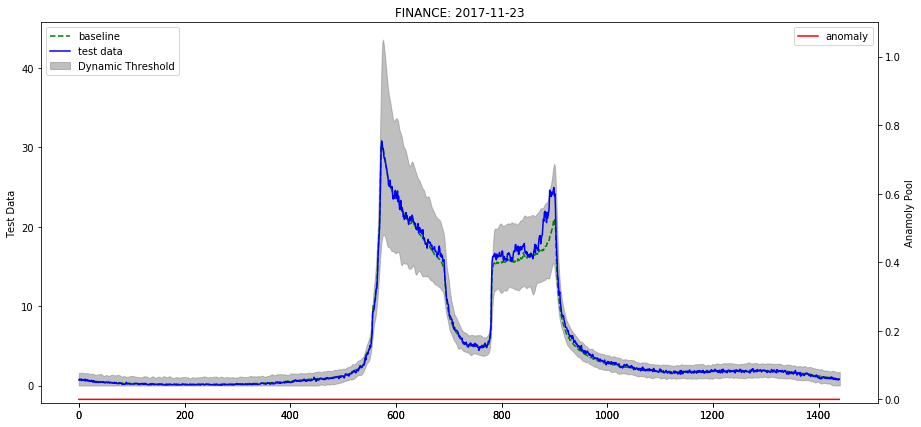

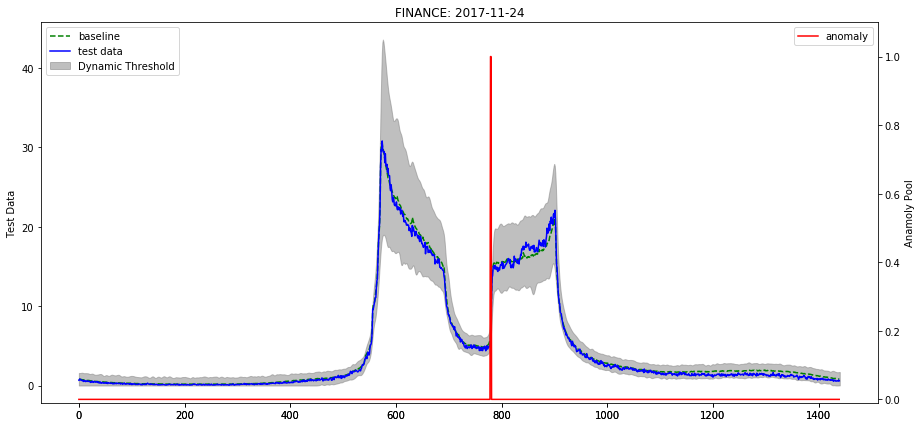

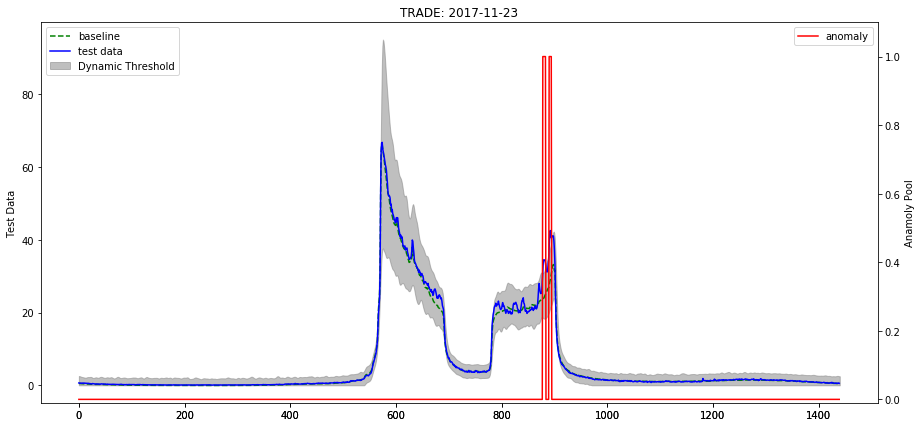

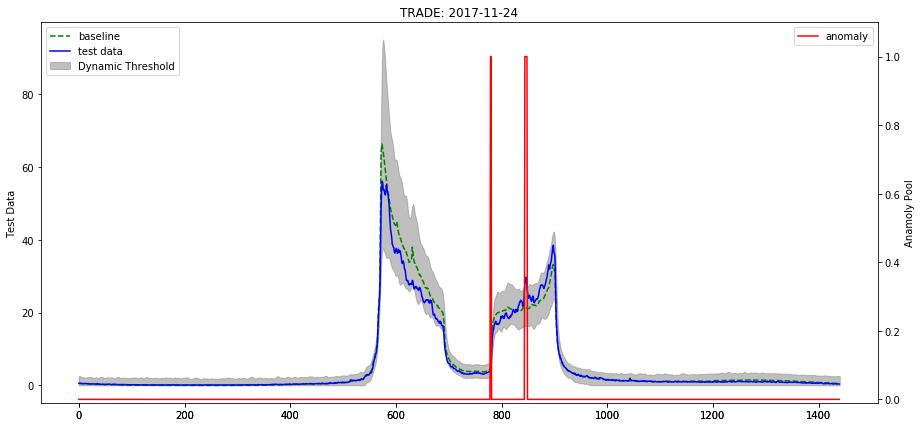

In [479]:
# test detect
anomaly_pool = my_detector.detect(raw.loc['2017-11-23':'2017-11-24'], verbose=1)

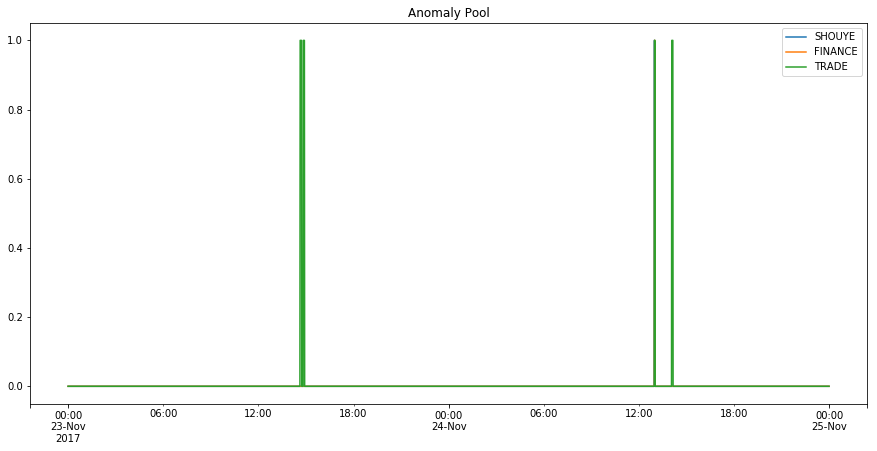

In [480]:
anomaly_pool.plot(figsize=(15, 7))
plt.title('Anomaly Pool')
plt.show()

## Alert Rules

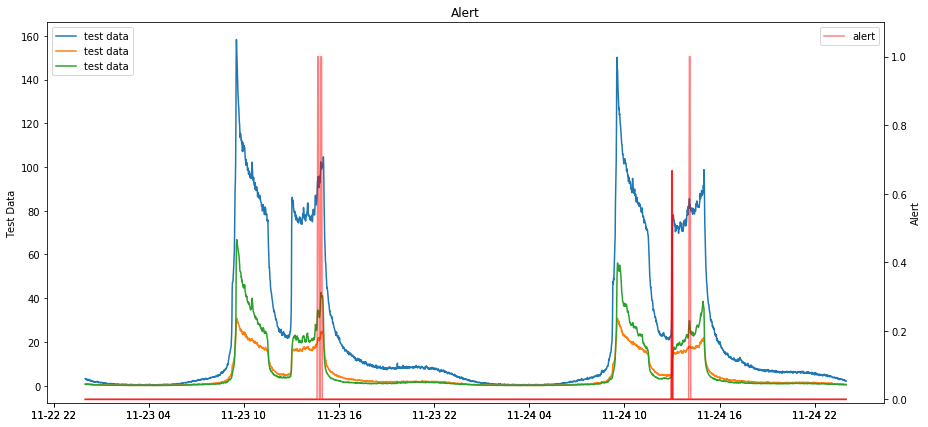

In [544]:
alert = anomaly_pool.rolling(3).sum().fillna(method='bfill')
# plt.plot(alert[alert>=3], 'ro', alpha=0.5)
# plt.plot(raw.loc['2017-11-23':'2017-11-24'])
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()
ax1.plot(raw.loc['2017-11-23':'2017-11-24'], label='test data')
ax1.set_ylabel('Test Data')
ax2.plot(alert/3, 'r', alpha=0.5, label='alert')
ax2.set_ylabel('Alert')
ax2.yaxis.set_label_position('right')
ax2.set_ylim([-0.01, 1.1])
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title('Alert')
plt.show()
plt.show()

In [549]:
alert.loc[(alert >= 1).all(axis=1) == True].index.tolist()

[Timestamp('2017-11-24 12:59:00', freq='T'),
 Timestamp('2017-11-24 13:00:00', freq='T'),
 Timestamp('2017-11-24 13:01:00', freq='T')]

## Relation Detector

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\jinliangyu\desktop\workplace\2018-01\venv\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
sy, fn, tr = (raw[['SHOUYE']].loc['2017-10-09'],
              raw[['FINANCE']].loc['2017-10-09'],
              raw[['TRADE']].loc['2017-10-09'])

In [27]:
%%time
from dtw import dtw, fastdtw
def my_custom_norm(x, y):
    return (x * x) + (y * y)

dist, cost, acc, path = fastdtw(sy.values, tr.values, dist=my_custom_norm)

Wall time: 7.32 s


(-0.5, 1438.5)

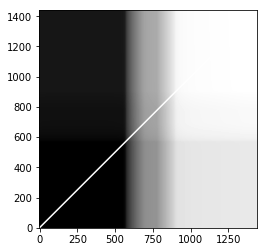

In [28]:
plt.imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))